# Coloring a planar graph with 5 colors

Piotr Sikora 250389

## Brief History of Proofs on Planar Graph Colorability

Mathematical proofs regarding planar graph colorability started with a widely acclaimed proof for Four Color Theorem by Alfred Kempe in 1879. In 1890, the proof was disproven by Percy Heawood, who then proved the Five Color Theorem. In 1976, Kenneth Appel and Wolfgang Haken assisted by Joch A. Koch proved The Four Color Theorem by computer. They checked 1482 reducible configurations which had to checked one by one by computer. This process took thousands of hours and the final proof was around 400 pages.  New proof (also with computer support) of Four Color Theorem was published, using only 633 configurations. Both of them show that a minial counterexample to the Four Color Theorem doesn't exists.

##  Proof of the 5 Color Theorem - Every planar graph can be 5-colored.

It's done by induction on the number of vertices.

**1. Base Case**

Simplest connected planar graph consists of a single vertex. Pick a color for it and we're done.

**2. Induction step**

1. Assmue $n \geq 1$ and that every planar graph with $n$ or fewer vertices can be 5-colored.
2. Consider a planar graph with $n+1$ vertices. 
    - We know that every simple planar graph has a vertex of degree at most 5. Remove that vertex and all edges connected to it. By induction we 5-color the remaining graph. Now we put the removed vertex and edges. All vertices are properly colored except the one we removed and put back in.
3. Now we have to color the remaining vertex. There are two possibilities:
    - it's degree is at most 5 and only 4 or fewer colors were used. We pick an available color, color it and we're done.
    - the vertex has degree 5 and all 5 colors are connected to it. Here's what we do:
         In this case, using numbers 1 through 5 to represent colors, we label the vertices adjacent to the “special” (degree 5) vertex 1 through 5 (in order). Now make a subgraph out of all the vertices colored 1 or 3 which are connected to the 1 and 3 colored vertices adjacent to the “special” vertex. If the adjacent vertex colored 1 and the adjacent vertex colored 3 are not connected by a path in this subgraph, simply exchange the colors 1 and 3 throughout the subgraph connected to the vertex colored 1. This will leave color 1 available to color the “special” vertex, and we are done. On the other hand, if the vertices colored 1 and 3 are connected via a path in the subgraph, we do the same “subgraph” process with vertices colored 2 and 4 adjacent to the “special” vertex. Note that this will be a disconnected pair of subgraphs, separated by a path connecting the vertices colored 1 and 3. Now we can exchange the colors 2 and 4 in the subgraph connected to the adjacent vertex labeled 2. This will leave color 2 for the “special” vertex.

## Difference between coloring a planar graph with 4 and 5 colors.

The main difference is that 5-coloring is trivial while 4-coloring is profound: 5-coloring uses a simple greedy algorithm that runs in linear time O(n) and always works because any vertex with degree ≤5 can be colored after its neighbors, whereas 4-coloring requires the Four Color Theorem (proven by computer-assisted case checking of hundreds of configurations) and has no comparably simple algorithm. 

## Algorythm

5-coloring a planar graph uses a greedy approach based on the fact that every planar graph has a vertex of at most 5.

In [ ]:
class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adj_list = {i: set() for i in range(num_vertices)}
    
    def add_edge(self, u, v):
        self.adj_list[u].add(v)
        self.adj_list[v].add(u)
    
    def degree(self, v):
        return len(self.adj_list[v])
    
    def neighbors(self, v):
        return self.adj_list[v]


def five_color_planar(graph):
    n = graph.num_vertices
    colors = {}
    active = set(range(n))
    removal_order = []
    
    while active:
        low_degree_vertex = None
        for v in active:
            active_degree = sum(1 for neighbor in graph.neighbors(v) 
                              if neighbor in active)
            if active_degree <= 5:
                low_degree_vertex = v
                break
        
        removal_order.append(low_degree_vertex)
        active.remove(low_degree_vertex)
    
    for v in reversed(removal_order):
        used_colors = set()
        for neighbor in graph.neighbors(v):
            if neighbor in colors:
                used_colors.add(colors[neighbor])
        
        available_color = None
        for color in range(5):
            if color not in used_colors:
                available_color = color
                break
        
        # If all 5 colors are used, tries swapping colors
        if available_color is None:
            neighbors_list = [n for n in graph.neighbors(v) if n in colors]
            
            # swapping colors between non-adjacent neighbors
            for i in range(len(neighbors_list)):
                for j in range(i + 1, len(neighbors_list)):
                    n1, n2 = neighbors_list[i], neighbors_list[j]
                    
                    # checks if n1 and n2 are non-adjacent
                    if n2 not in graph.neighbors(n1):
                        c1, c2 = colors[n1], colors[n2]
                        
                        # finds a connected component of a subgraph with colors c1 and c2, starting from n1
                        connected_subgraph = {n1}
                        to_visit = [n1]
                        
                        while to_visit:
                            current = to_visit.pop()
                            for neighbor in graph.neighbors(current):
                                if neighbor in colors and neighbor not in connected_subgraph:
                                    if colors[neighbor] in {c1, c2}:
                                        connected_subgraph.add(neighbor)
                                        to_visit.append(neighbor)
                        
                        # if n2 is connected to that subgraph, swap colors
                        if n2 not in connected_subgraph:
                            for vertex in connected_subgraph:
                                colors[vertex] = c2 if colors[vertex] == c1 else c1
                            available_color = c1
                            break
                
                if available_color is not None:
                    break
        
        if available_color is not None:
            colors[v] = available_color
        else:
            raise Exception(f"Failed to color vertex {v}")
    
    return colors

In [4]:
# Goldner–Harary graph
edges = [
    (0, 1),(0,2),(0,3),(0,4),(0,5),(0,6),(0,7),(0,10),(1,4),
    (1,5),(2,5),(2,6),(3,4),(3,10),(4,5),(4,8),(4,10),(5,6),
    (5,8),(5,9),(5,10),(6,7),(6,9),(6,10),(7,10),(8,10),(9,10)
]
G = Graph(11)

for edge in edges:
    G.add_edge(edge[0], edge[1])

coloring = five_color_planar(G)
for vertex in range(G.num_vertices):
    print(f"Vertex {vertex}: Color {coloring[vertex]}")

Vertex 0: Color 4
Vertex 1: Color 0
Vertex 2: Color 0
Vertex 3: Color 1
Vertex 4: Color 2
Vertex 5: Color 3
Vertex 6: Color 2
Vertex 7: Color 1
Vertex 8: Color 1
Vertex 9: Color 1
Vertex 10: Color 0


{0: Text(-1.0, -0.35714285714285715, '0'),
 1: Text(0.7678571428571429, -0.35714285714285715, '1'),
 2: Text(-0.3125, 0.23214285714285715, '2'),
 3: Text(0.17857142857142858, -0.1607142857142857, '3'),
 4: Text(0.5714285714285714, -0.2589285714285714, '4'),
 5: Text(-0.11607142857142855, 0.5267857142857142, '5'),
 6: Text(-0.21428571428571427, 0.13392857142857142, '6'),
 7: Text(-0.21428571428571427, 0.035714285714285726, '7'),
 8: Text(0.2767857142857143, 0.035714285714285726, '8'),
 9: Text(-0.11607142857142855, 0.23214285714285715, '9'),
 10: Text(0.17857142857142858, -0.062499999999999986, '10')}

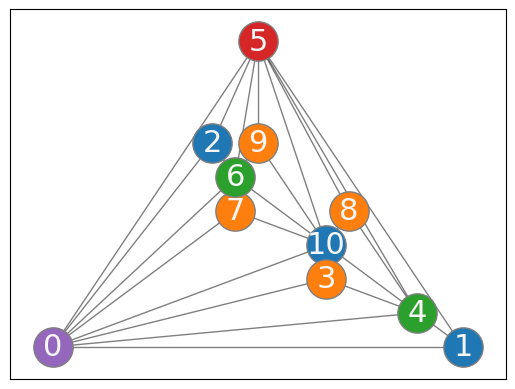

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

G_nx = nx.Graph(G.adj_list)

pos = nx.planar_layout(G_nx)
options = {"edgecolors": "tab:gray", "node_size": 800}
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

for i in range(5):
    nodelist = [v for v in range(G.num_vertices) if coloring[v] == i]
    nx.draw_networkx_nodes(G_nx, pos, nodelist=nodelist, node_color=colors[i], **options)

nx.draw_networkx_edges(G_nx, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G_nx, pos, {i: str(i) for i in range(G.num_vertices)}, font_size=22, font_color="whitesmoke")

Let's visualize the algoryhm in practice with this ordering and an optimal one